- 参考：
    - https://medium.com/konvergen/cross-entropy-and-maximum-likelihood-estimation-58942b52517a

## Entropy

- Entropy: 随机变量（或者对一个概率分布）不确定性的度量

$$
H(X)=-\sum_xp(x)\log p(x)
$$

- 考虑一个特例，$p(X=x_0) == 1$，则有

$$
\begin{split}
H(X)&=-\sum_xp(x)\log p(x)\\
&=-p(x_0)\log p(x_0)\\
&=-1\log 1\\
&=0
\end{split}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def entropy(dist):
    assert np.sum(dist) == 1.
    return -np.sum([p*np.log2(p) for p in dist])

/tmp/ipykernel_4026114/749262781.py:3: RuntimeWarning: divide by zero encountered in log2
  return -np.sum([p*np.log2(p) for p in dist])
/tmp/ipykernel_4026114/749262781.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return -np.sum([p*np.log2(p) for p in dist])


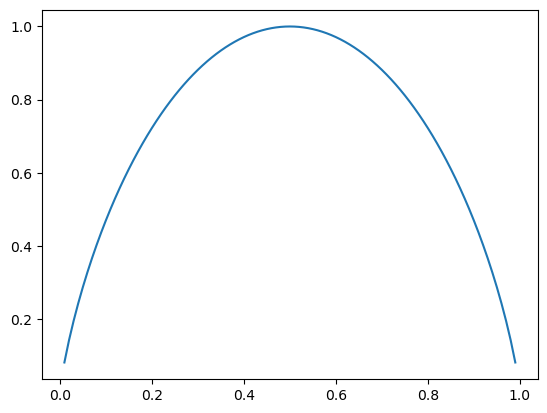

In [7]:
ps = np.arange(0, 1, .01)
ents = [entropy([p, 1-p]) for p in ps]
plt.plot(p, ents)

## Entropy 与 Expectation

- So the entropy of a random variable is the expected value of the random variable $\log(1/p(x))$ where $X$ is drawn from $p(x)$. 
- Note that we can also denote entropy by $H(p)$.

$$
\begin{split}
H(X)&=-\sum_xp(x)\log p(x)\\
&=\sum_xp(x)\log \frac1{p(x)}\\
&=\mathbb E_{X\sim p(x)}\left[\log \frac1{p(x)}\right]
\end{split}
$$

## 相对熵或KL-散度，与交叉熵

- 未知概率分布 $p(x)$，我们用 $q(x)$ 去逼近 $p(x)$，我们定义相对熵或者叫 kl 散度

$$
\begin{split}
D(p||q)&=\sum_xp(x)\log \frac{p(x)}{q(x)}\\
&=\mathbb E_{X\sim p(x)}\left[\log \frac{p(x)}{q(x)}\right]\\
&=\mathbb E_{X\sim p(x)}\left[\log\frac1{q(x)}\right]-E_{X\sim p(x)}\left[\log\frac1{p(x)}\right]\\
&=H(p,q)-H(p)
\end{split}
$$

- $H(p,q)=\mathbb E_{X\sim p(x)}\left[\log\frac1{q(x)}\right]$ 就叫交叉熵

$$
H(p,q)=D(p||q)+H(p)
$$

## MLE: 最大似然估计

- 统计学习方法中的一个核心计算原则，对于一个数据驱动的统计学习问题
    - $X_{\text{example}}=\{x_1,x_2,\cdots,x_N\}$, 从 $p_{\text{data}}(x)$ （true 但未知，待学习）的分布中独立采样得到；
        - $x_i$ 观察得到的数据独立同分布（iid, $p_{\text{data}}(x)$）采样得到，
    - 现在的问题是通过这些观察数据中估计 $p_{\text{model}}(x;\theta)$ （$\theta$ 即为待估计的参数）

$$
\begin{split}
\theta_{ML}&=\arg\max_\theta p_{\text{model}}(X_\text{example};\theta)\\
&=\arg\max_\theta \Pi_{i=1}^N p_{\text{model}}(x_i;\theta)\\
&=\arg\max_\theta \sum_{i=1}^N \log p_{\text{model}}(x_i;\theta)\\
&=\arg\max_\theta \sum_{i=1}^N \frac1N\log p_{\text{model}}(x_i;\theta)\\
&\approx\arg\max_\theta\mathbb E_{X\sim p_{\text{data}}(x)}[\log p_{\text{model}}(x;\theta)],\quad \text{law of large numbers}
\end{split}
$$

- 我们通过 $p_{\text{model}}(x;\theta)$ （分布, 记为 $q(x)$） 来逼近 $p_{\text{data}}(x)$（分布，记为 $p(x)$）

$$
\begin{split}
\theta_{ML}&=\arg\max_\theta\mathbb E_{X\sim p(x)}[\log q(x)]\\
&=\arg\min_\theta\mathbb -E_{X\sim p(x)}[\log q(x)]\\
&=\arg\min_\theta\mathbb E_{X\sim p(x)}\left[\log \frac1{q(x)}\right]
\end{split}
$$